<a href="https://colab.research.google.com/github/joony0512/Crawling_Data/blob/main/Part5/P5_Ch12_CH12_06_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/#fastcampus
!pwd

!ls

/content/drive/MyDrive/#fastcampus
/content/drive/MyDrive/#fastcampus
 config_utils.py      data_utils.py   requirements.txt
 config_utils_tf.py   __init__.py     runs
 config.yaml	      logs	     'runs(torch)'
 custom_math.py       models	      wandb
 data		      __pycache__    '[강의자료]-노트북-ipynb-파일'


In [3]:
import os
import sys
sys.path.append('/content/drive/MyDrive/#fastcampus')
drive_project_root = '/content/drive/MyDrive/#fastcampus'
!pip install -r '/content/drive/MyDrive/#fastcampus/requirements.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.4/813.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.6/144.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 81.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.6/222.6 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.4/435.4 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 k

In [4]:
!pip install tensorflow-addons
!pip install wandb
!pip install omegaconf
!pip install hydra-core==1.1


  Using cached tensorflow_addons-0.21.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (612 kB)
  Using cached wandb-0.15.8-py3-none-any.whl (2.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=30698a0e9ca4a80d78ead994cebd7368875cc9f0f8f39c59800a48cb8a579737
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-

  Using cached hydra_core-1.1.0-py3-none-any.whl (144 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141210 sha256=c5d8076d4febd91288b8054cf97be5399d42278abaa0378ac0bc354835c3a741
  Stored in directory: /root/.cache/pip/wheels/a7/20/bd/e1477d664f22d99989fd28ee1a43d6633dddb5cb9e801350d5
Successfully built antlr4-python3-runtime
  Attempting uninstall: antlr4-python3-runtime
    Found existing installation: antlr4-python3-runtime 4.9.3
    Uninstalling antlr4-python3-runtime-4.9.3:
      Successfully uninstalled antlr4-python3-runtime-4.9.3
  Attempting uninstall: omegaconf
    Found existing installation: omegaconf 2.3.0
    Uninstalling omegaconf-2.3.0:
      Successfully uninstalled omegaconf-2.3.0


In [5]:
from datetime import datetime
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from omegaconf import DictConfig
import hydra
from hydra.core.config_store import ConfigStore

import tensorflow_probability as tfp
import tensorflow as tf
import tensorflow_addons as tfa

import wandb


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
from data_utils import dataset_split
from config_utils_tf import flatten_dict
from config_utils_tf import register_config
from config_utils_tf import get_optimizer_element
from config_utils_tf import get_callbacks

In [7]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
!nvidia-smi

Tue Aug 22 08:49:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 모델정의


In [11]:
class GAN(tf.keras.Model):
  def __init__(self, cfg : DictConfig):
    super().__init__()
    self.cfg = cfg
    self.latent_dim = cfg.model.latent_dim
    self.discriminator = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(**cfg.model.dis.conv1),
            tf.keras.layers.Conv2D(**cfg.model.dis.conv2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1),
        ],
        name='discriminator',
    )
    self.generator = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(
                units = cfg.model.gen.in_fc.units,
                activation = tf.nn.relu
            ),
            tf.keras.layers.Reshape(
                target_shape = tuple(cfg.model.gen.reshape_shape)
            ),
            tf.keras.layers.Conv2DTranspose(**cfg.model.gen.tr_conv1),
            tf.keras.layers.Conv2DTranspose(**cfg.model.gen.tr_conv2),
            tf.keras.layers.Conv2DTranspose(**cfg.model.gen.tr_conv3),

        ],
        name ='generator'
    )
    self.generator_loss_tracker = tf.keras.metrics.Mean(name ="generator_loss")
    self.discriminator_loss_tracker = tf.keras.metrics.Mean(name ="discriminator_loss")
    self.cross_entropy = tf.keras.losses.BinaryCrossentropy(
        from_logits = True, reduction = tf.keras.losses.Reduction.SUM
    )

  @property
  def metrics(self):
    return [
        self.generator_loss_tracker,
        self.discriminator_loss_tracker,
    ]
  def compile(self, d_optimizer, g_optimizer, **kwargs):
    super().compile(**kwargs)
    self.d_optimizer = d_optimizer
    self.g_optimizer = g_optimizer


  @tf.function
  def get_generator_loss(self, fake_outputs):
    return self.cross_entropy(
        tf.ones_like(fake_outputs), fake_outputs
    )/ fake_outputs.shape[0]

  @tf.function
  def get_discriminator_loss(self, real_outputs, fake_outputs):
    real_loss = self.cross_entropy(
        tf.zeros_like(real_outputs), real_outputs
    )
    fake_loss = self.cross_entropy(
        tf.zeros_like(fake_outputs),  fake_outputs
    )
    total_d_loss = (real_loss + fake_loss) / (real_outputs.shape[0] + fake_outputs[0])
    return total_d_loss


  @tf.function
  def sample(self, sample_size = 100 ):
      return tf.random.normal(shape = (sample_size, 1,1, self.latent_dim))

  def call(self, _, training = False):
    noise = self.sample(sample_size = self.cfg.train.train_batch_size)
    generated_images = self.generator(noise, training = training)
    discriminator_results = self.discriminator(generated_images,training = training)
    return generated_images, discriminator_results

  def train_step(self, data):
        images, _ = data
        # images = [B X 28 X 28] -> [B X 28 X 28 X 1]
        images = tf.cast(tf.expand_dims(images, -1), tf.float32)

        with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
            outputs, fake_output = self(None, training=True)
            real_output = self.discriminator(images, training = True)

            # compute loss
            g_loss = self.get_generator_loss(fake_output)
            d_loss = self.get_discriminator_loss(real_output, fake_output)


        # compute gradients
        g_gradients = g_tape.gradient(g_loss, self.generator.trainable_variables)
        d_gradients = d_tape.gradient(d_loss, self.discriminator.trainable_variables)

        # update weights
        self.g_optimizer.apply_gradients(zip(g_gradients, self.generator.trainable_vars))
        self.d_optimizer.apply_gradients(zip(d_gradients, self.discriminator.trainable_vars))

        # update the metrics
        self.generator_loss_tracker.update_state(g_loss)
        self.discriminator_loss_tracker.update_state(d_loss)

        # tensorboard image update
        tf.summary.image("train_real_img", images, max_outputs=5)
        tf.summary.image("train_generated_img", outputs, max_outputs=5)

        # return a dict mapping metrics names to current values
        logs = {m.name: m.result() for m in self.metrics}
        return logs

  def test_step(self, data):
    images, _ = data
    #images =[B, 28, 28] -> [B, 28, 28, 1]
    images = tf.cast(tf.expand_dims(images, -1), tf.float32)

    outputs, fake_output = self(None, training=True)

    real_output = self.discriminator(images, training = True)
    # compute loss
    g_loss = self.get_generator_loss(fake_output)
    d_loss = self.get_discriminator_loss(real_output, fake_output)

    # update the metrics
    # update the metrics
    self.generator_loss_tracker.update_state(g_loss)
    self.discriminator_loss_tracker.update_state(d_loss)

    # tensorboard image update
    tf.summary.image("val_real_img", images, max_outputs=5)
    tf.summary.image("val_generated_img", outputs, max_outputs=5)

    # return a dict mapping metrics names to current values
    logs = {m.name : m.result() for m in self.metrics}
    return logs



In [ ]:
class VAE(tf.keras.Model):
  """Convolutional variational autoencoder"""
  def __init__(self, cfg : DictConfig):
    super().__init__() # 클래스를 상속받았기 때문에 init해줘야한다
    self.cfg = cfg
    self.latent_dim = cfg.model.latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(**cfg.model.enc.conv1),
            tf.keras.layers.Conv2D(**cfg.model.enc.conv2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(cfg.model.enc.out_fc.units),
        ],
        name='encoder',
    )
    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(
                units = cfg.model.dec.in_fc.units,
                activation = tf.nn.relu
            ),
            tf.keras.layers.Reshape(
                target_shape = tuple(cfg.model.dec.reshape_shape)
            ),
            tf.keras.layers.Conv2DTranspose(**cfg.model.dec.tr_conv1),
            tf.keras.layers.Conv2DTranspose(**cfg.model.dec.tr_conv2),
            tf.keras.layers.Conv2DTranspose(**cfg.model.dec.tr_conv3),

        ],
        name ='decoder'
    )
    self.total_loss_tracker = tf.keras.metrics.Mean(name ="total_loss")
    self.recon_loss_tracker = tf.keras.metrics.Mean(name ="recon_loss")
    self.kl_loss_tracker = tf.keras.metrics.Mean(name ="kl_loss")

  @property
  def metrics(self):
    return [
        self.total_loss_tracker,
        self.recon_loss_tracker,
        self.kl_loss_tracker
    ]

  @tf.function
  def sample(self, epsilon = None, sample_size = 100 ):
    if epsilon is None :
      epsilon = tf.random.normal(shape = (sample_size, self.latent_dim))
      return self.decode(epsilon)

  def encode(self, x, training= False):
    mu, logvar = tf.split(
        self.encoder(x, training = training),
        num_or_size_splits=2,
        axis =1)
    return mu, logvar

  def reparameterize(self, mu, logvar):
    """get z"""
    epsilon = tf.random.normal(shape=mu.shape)
    return mu + epsilon * tf.exp(logvar * .5)

  def decode(self, z, training = False):
    return tf.sigmoid(self.decoder(z, training =training))

  def call(self, input, training = False):
    mu, logvar = self.encode(input, training = training)
    z = self.reparameterize(mu, logvar)
    output = self.decode(z, training = training)
    return output , z, mu, logvar

  def train_step(self, data):
        images, _ = data
        # images = [B X 28 X 28] -> [B X 28 X 28 X 1]
        images = tf.cast(tf.expand_dims(images, -1), tf.float32)

        with tf.GradientTape() as tape:
            outputs, z, z_mu, z_logvar = self(images, training=True)

            # reconstuction loss
            recon_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.mae(images, outputs),
                    axis=(1, 2)
                )
            )

            # kld_loss
            kl_loss = -0.5 * (1 + z_logvar - tf.square(z_mu) - tf.exp(z_logvar))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            # total_loss
            total_loss = recon_loss + kl_loss

        # compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(total_loss, trainable_vars)

        # update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # update the metrics
        self.total_loss_tracker.update_state(total_loss)
        self.recon_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        # tensorboard image update
        tf.summary.image("train_source_img", images, max_outputs=5)
        tf.summary.image("train_recon_img", outputs, max_outputs=5)

        # return a dict mapping metrics names to current values
        logs = {m.name: m.result() for m in self.metrics}
        return logs

  def test_step(self, data):
    images, _ = data
    #images =[B, 28, 28] -> [B, 28, 28, 1]
    images = tf.cast(tf.expand_dims(images, -1), tf.float32)

    outputs, z, z_mu, z_logvar = self(images, training = True)

    # reconstruction loss
    recon_loss = tf.reduce_mean(
          tf.reduce_sum( # batch 별로
            tf.keras.losses.mae(images, outputs), # image 별로
            axis = (1,2)
          )
    )
    # kld_loss
    kl_loss = -0.5 * (1 + z_logvar - tf.square(z_mu) - tf.exp(z_logvar))
    kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis = 1))

    # total_loss
    total_loss = recon_loss + kl_loss

    # update the metrics
    self.total_loss_tracker.update_state(total_loss)
    self.recon_loss_tracker.update_state(recon_loss)
    self.kl_loss_tracker.update_state(kl_loss)

    # tensorboard image update
    tf.summary.image("train_source_img", images, max_outputs =5)
    tf.summary.image("train_recon_img", outputs, max_outputs =5)

    # return a dict mapping metrics names to current values
    logs = {m.name : m.result() for m in self.metrics}
    return logs



## configuration 정의

In [ ]:
# data configuration
data_fashion_mnist_cfg : dict ={
    "n_class_": 10,
    "train_val_split" : [0.9,0.1],
    "train_val_shuffle" : True,
    "train_val_shuffle_buffer_size" : 1024,
    "test_shuffle" : False,
    "test_shuffle_buffer_size" : 1024,

}

model_mnist_vae_cfg : dict ={
    'name' : 'VAE',
    'data_normalize': True,
    'latent_dim' : 2,
    'enc' : {
        'conv1' : {
            'filters' : 32,
            'kernel_size' : 3,
            'strides' : [2,2],
            'activation' : 'relu',

        },
        'conv2' : {
            'filters' : 64,
            'kernel_size' : 3,
            'strides' : [2,2],
            'activation' : 'relu',
        },
        'out_fc' : {
            'units' : 4, # latent_dim * 2 (mu, log_var)
        },
    },
    'dec' : {
        'in_fc' : {
            'units' : 7*7*32,
        },
        'reshape_shape' : [7, 7, 32],
        'tr_conv1' : {
            'filters' : 64,
            'kernel_size' : 3,
            'strides' : [2,2],
            'padding' : 'same',
            'activation' : 'relu',
        },
        'tr_conv2' : {
            'filters' : 32,
            'kernel_size' : 3,
            'strides' : [2,2],
            'padding' : 'same',
            'activation' : 'relu',
        },
        'tr_conv3' : {
            'filters' : 1,
            'kernel_size' : 3,
            'strides' : [1,1],
            'padding' : 'same',
        }
    }
}


# optimizer_configs

adam_warmup_lr_sch_opt_cfg  ={
    "optimizer" :{
        "name" : "Adam",
        "other_kwargs" :{}, # 빈값이면 기본이 들어감
    },
    "lr_scheduler":{
        "name" : "LinearWarmupLRSchedule",
        "kwargs" : {
            "lr_peak" : 1e-3,
            "warmup_end_steps" : 1500,
        }
    }
}

radam_no_lr_sch_opt_cfg  ={ # Radam은 굳이 스케줄러 필요 없음
    "optimizer" :{
        "name" : "RectifiedAdam",
        "learning_rate" : 1e-3,
        "other_kwargs" :{}, # 빈값이면 기본이 들어감
    },
    "lr_scheduler": None
}

# train configs

train_cfg : dict ={
    "train_batch_size" : 128,
    "val_batch_size" : 32,
    "test_batch_size" : 32,
    "max_epochs" : 50,
    "distribute_strategy" : "MirroredStrategy",
}

_merged_cfg_presets ={
    "vae_fashion_mnist_radam" :{
        "data" : data_fashion_mnist_cfg,
        "model" : model_mnist_vae_cfg,
        "opt" : radam_no_lr_sch_opt_cfg,
        "train" : train_cfg,

    },
}

### hydra composition ###
# clear hydra instance.
hydra.core.global_hydra.GlobalHydra.instance().clear()

# resister preset cfgs
register_config(_merged_cfg_presets)

# initializing
hydra.initialize(config_path =None)

using_config_key = "vae_fashion_mnist_radam"
cfg = hydra.compose(using_config_key)

# define & override log_cfg
model_name = cfg.model.name
run_dirname ='fastcampus_generative_model_tutorials_tf'
run_name = f'{datetime.now().isoformat(timespec="seconds")} -{using_config_key}-{model_name}'
log_dir = os.path.join(drive_project_root, 'runs', run_dirname, run_name)




log_cfg ={
    "run_name" : run_name,
    "callbacks" : {
        "TensorBoard" :{
          "log_dir" :log_dir,
          "update_freq" :10,
        },

    },
    "wandb" : {
        "project" : "fastcampus_generative_model_tutorials_tf",
        "name" : run_name,
        "tags" : ["fastcampus_generative_model_tutorials_tf"],
        "reinit" : True,
        "sync_tensorboard" : True
        }

}

# unlock struct of config & set log config
OmegaConf.set_struct(cfg, False)
cfg.log =log_cfg

# relock config
OmegaConf.set_struct(cfg, True)
print(OmegaConf.to_yaml(cfg))

# save yaml
# with open(os.path.join(log_dir, "config.yaml")) as f :
with  open("config.yaml", "w") as f :
  OmegaConf.save(cfg, f)

data:
  n_class_: 10
  train_val_split:
  - 0.9
  - 0.1
  train_val_shuffle: true
  train_val_shuffle_buffer_size: 1024
  test_shuffle: false
  test_shuffle_buffer_size: 1024
model:
  name: VAE
  data_normalize: true
  latent_dim: 2
  enc:
    conv1:
      filters: 32
      kernel_size: 3
      strides:
      - 2
      - 2
      activation: relu
    conv2:
      filters: 64
      kernel_size: 3
      strides:
      - 2
      - 2
      activation: relu
    out_fc:
      units: 4
  dec:
    in_fc:
      units: 1568
    reshape_shape:
    - 7
    - 7
    - 32
    tr_conv1:
      filters: 64
      kernel_size: 3
      strides:
      - 2
      - 2
      padding: same
      activation: relu
    tr_conv2:
      filters: 32
      kernel_size: 3
      strides:
      - 2
      - 2
      padding: same
      activation: relu
    tr_conv3:
      filters: 1
      kernel_size: 3
      strides:
      - 1
      - 1
      padding: same
opt:
  optimizer:
    name: RectifiedAdam
    learning_rate: 0.001
 

In [ ]:
def get_distribute_strategy(strategy_name : str, **kwargs):
  return getattr(tf.distribute, strategy_name)(**kwargs)

distribute_strategy = get_distribute_strategy(cfg.train.distribute_strategy)

In [ ]:
with distribute_strategy.scope():
  # 데이터셋 정의
  fashion_mnist = tf.keras.datasets.fashion_mnist
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

  # normalization
  if cfg.model.data_normalize:
      x_train =x_train/255.0
      x_test = x_test/255.0

  # train/val splits
  assert sum(cfg.data.train_val_split) ==1.0
  train_size = int(len(x_train)*cfg.data.train_val_split[0])
  val_size = len(x_train) -train_size

  dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

  test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
  if cfg.data.train_val_shuffle :
    dataset = dataset.shuffle(
        buffer_size = cfg.data.train_val_shuffle_buffer_size,
        )
  if cfg.data.test_shuffle :
    test_dataset = test_dataset.shuffle(
        buffer_size= cfg.data.test_shuffle_buffer_size,
    )


  train_dataset = dataset.take(train_size)
  val_dataset = dataset.skip(train_size)
  print(len(train_dataset), len(val_dataset), len(dataset), len(test_dataset))

  # dataloader 정의
  train_batch_size = cfg.train.train_batch_size
  val_batch_size = cfg.train.val_batch_size
  test_batch_size = cfg.train.test_batch_size

  train_dataloader = train_dataset.batch(train_batch_size, drop_remainder=True)
  val_dataloader = val_dataset.batch(val_batch_size, drop_remainder=True)
  test_dataloader = test_dataset.batch(test_batch_size, drop_remainder=True)

sample_example = next(iter(train_dataloader))
print(sample_example)

54000 6000 60000 10000
(<tf.Tensor: shape=(128, 28, 28), dtype=float64, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.00392157, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.00392157, ..., 0.01568627,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.      

In [ ]:
# 모델정의
def get_model(cfg : DictConfig):
  if cfg.model.name =="VAE":
    model = VAE(cfg)

  else:
    raise NotImplementedError()
  return model



with distribute_strategy.scope():
     model = get_model(cfg)


    #define optimizer & scheduler
     optimizer, scheduler = get_optimizer_element(
        cfg.opt.optimizer, cfg.opt.lr_scheduler
        )

     model.compile(
        optimizer = optimizer,#run_eagerly =True
     )

     model.build((train_batch_size, 28, 28, 1)) #디버깅할떄 좋음

model.summary()

Model: "vae_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (128, 4)                  28036     
                                                                 
 decoder (Sequential)        (128, 28, 28, 1)          41953     
                                                                 
Total params: 69,995
Trainable params: 69,989
Non-trainable params: 6
_________________________________________________________________


In [ ]:
flatten_dict(cfg)

{'data_n_class_': 10,
 'data_train_val_split': [0.9, 0.1],
 'data_train_val_shuffle': True,
 'data_train_val_shuffle_buffer_size': 1024,
 'data_test_shuffle': False,
 'data_test_shuffle_buffer_size': 1024,
 'model_name': 'VAE',
 'model_data_normalize': True,
 'model_latent_dim': 2,
 'model_enc_conv1_filters': 32,
 'model_enc_conv1_kernel_size': 3,
 'model_enc_conv1_strides': [2, 2],
 'model_enc_conv1_activation': 'relu',
 'model_enc_conv2_filters': 64,
 'model_enc_conv2_kernel_size': 3,
 'model_enc_conv2_strides': [2, 2],
 'model_enc_conv2_activation': 'relu',
 'model_enc_out_fc_units': 4,
 'model_dec_in_fc_units': 1568,
 'model_dec_reshape_shape': [7, 7, 32],
 'model_dec_tr_conv1_filters': 64,
 'model_dec_tr_conv1_kernel_size': 3,
 'model_dec_tr_conv1_strides': [2, 2],
 'model_dec_tr_conv1_padding': 'same',
 'model_dec_tr_conv1_activation': 'relu',
 'model_dec_tr_conv2_filters': 32,
 'model_dec_tr_conv2_kernel_size': 3,
 'model_dec_tr_conv2_strides': [2, 2],
 'model_dec_tr_conv2_paddi

In [ ]:
# get callbacks
callbacks = get_callbacks(cfg.log)

# wandb setup
wandb.init(
    config = flatten_dict(cfg),
    **cfg.log.wandb
)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/\#fastcampus/runs/fastcampus_generative_model_tutorials_tf
model.fit(
    train_dataloader,
    validation_data = val_dataloader,
    epochs = cfg.train.max_epochs,
    callbacks =callbacks,
)


## Model testing

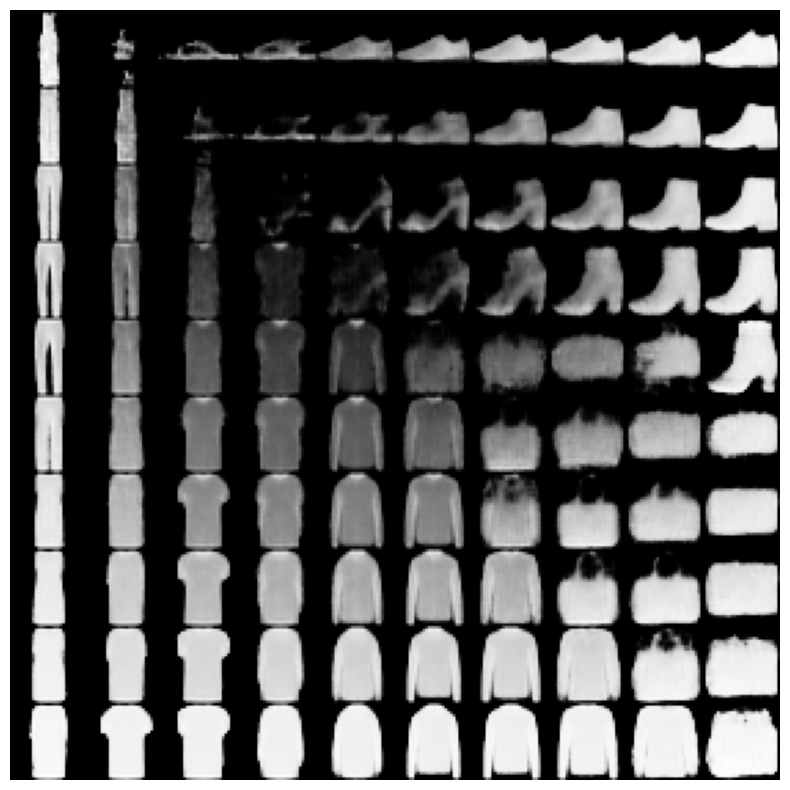

In [ ]:
def get_latent_img(model, n, single_img_size =28):
  """plot n x n images decoded from the latent_space"""
  norm = tfp.distributions.Normal(0,1)
  grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
  grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
  width = single_img_size * n
  heights = width
  image = np.zeros((heights, width))

  for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
      z = np.array([[xi, yi]])
      # x_decoded = model.sample(z)
      x_decoded = model.decode(z)

      digit = tf.reshape(x_decoded[0], (single_img_size, single_img_size))
      image[
          i * single_img_size: (i+1) * single_img_size,
          j * single_img_size: (j+1) * single_img_size,
      ] = digit.numpy()
  return image

latent_img = get_latent_img(model, n=10)
plt.figure(figsize = (10,10))
plt.imshow(latent_img, cmap ='Greys_r')
plt.axis('Off')
plt.show()

